In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from numpy.fft import fft, ifft

In [3]:
btc_hist_data = pd.read_excel("1\\Bitcoin Historical Data.xlsx").replace([',','%'],'')
btc_hist_data = btc_hist_data.iloc[::-1]

Date = btc_hist_data["Date"]
btc_close_price = btc_hist_data['Price']


median / ma / ema / wma / conv / fourier / laplas / wavelet /  modulation/demodulation / correlation / cepstrum

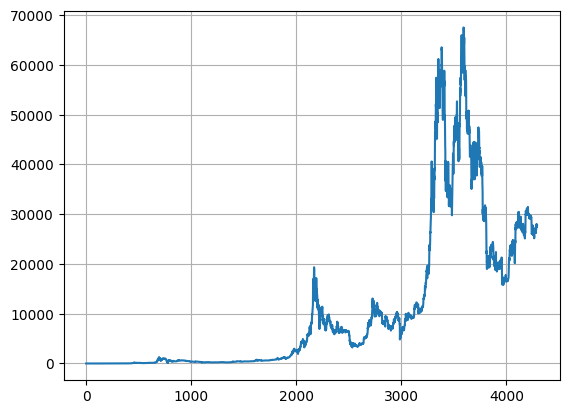

In [4]:
fig =plt.figure(1)
plt.plot(btc_close_price.values)

plt.grid()
plt.show()

Moving Median - The mid point value

In [5]:
def mm(df, period = 14 ):
    MM = df.rolling(period).median()
    return MM


Moving Average

In [6]:
def ma(df, period = 14 ):
    MA = df.rolling(period).mean()
    return MA

Exponential Moving Average 

In [7]:
def ema(df, period = 14 ):
    EMA = df.ewm(period).mean()
    return EMA

Weigthed Moving Average

In [8]:
def wma(df ,period = 14):
    

SyntaxError: incomplete input (80872647.py, line 2)

Fourier 

In [11]:
def fourier(df , sampling_rate = 4096, plot_on = True, one_side = True, trim = True , trim_frequency = 250):
    fft_df = fft(df)
    N = len(fft_df)
    n = np.arange(N)
    
    T = N/sampling_rate
    freq = n/T  
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]
    if plot_on:
        plt.figure(figsize = (21, 6))
        if one_side:
            plt.subplot(121)
            plt.stem(f_oneside, np.abs(fft_df[:n_oneside]), 'b', \
            markerfmt=" ", basefmt="-b")
            plt.xlabel('Freq (Hz)')
            plt.ylabel('FFT Amplitude |X(freq)|')
        else:
            plt.subplot(121)
            plt.stem(freq, np.abs(fft_df), 'b', \
            markerfmt=" ", basefmt="-b")
            plt.xlabel('Freq (Hz)')
            plt.ylabel('FFT Amplitude |X(freq)|')
        if trim:
            plt.subplot(122)
            plt.plot(ifft((fft_df[:trim_frequency])), 'r')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
        plt.tight_layout()
        plt.show()
    return fft_df 

In [13]:
fft_btc = fourier(btc_close_price,plot_on= False)

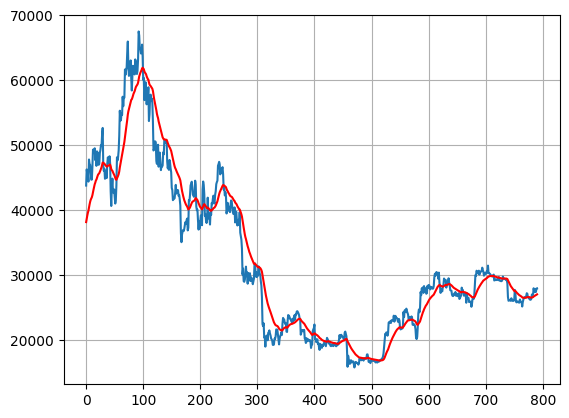

In [ ]:
fig =plt.figure(1)
plt.plot(btc_close_price[3500:-1].values)
plt.plot(ema.values[3500:-1] , color = 'red')
plt.grid()
plt.show()